# Filtracja bilateralna

## Konwolucja obrazu z filtrem o zadanych współczynnikach

Splot (konwolucję) obrazu wejściowego $I$ z filtrem $\psi$ dla ustalonego punktu obrazu $\mathbf{x}$ można przedstawić następująco:

\begin{equation}
\hat{I}(\mathbf{x}) = \frac{1}{W_N}\sum_{\mathbf{p} \in \eta(\mathbf{x})} \psi(||\mathbf{p}-\mathbf{x}||)I(\mathbf{p})
\tag{1}
\end{equation}

gdzie:
- $\hat{I}$ jest obrazem wynikowym (przefiltrowanym),
- $W_N = \sum_y \psi(y)$ jest parametrem normalizującym współczynniki filtra $\psi$,
- $||\cdot||$ jest odległością między punktami obrazu $\mathbf{x}$ i $\mathbf{p}$ według ustalonej metryki (np. norma $L_2$). Uwaga, proszę pamiętać, że zarówno $\mathbf{x}$, jak i $\mathbf{p}$ to współrzędne przestrzenne,
- $\eta(\mathbf{x})$ jest otoczeniem punktu $\mathbf{x}$.

Funkcja $\psi$ decyduje o charakterze filtracji. Dla filtru Gaussowskiego:

\begin{equation}
\psi(y) = G_{\delta_s}(y)
\tag{2}
\end{equation}

gdzie: $G_{\delta_s}(y)$ jest funkcją Gaussa z parametrem skali $\delta_s$.

Opisaną powyżej filtrację realizowaliśmy w ramach ćwiczenia "Przetwarzanie wstępne. Filtracja kontekstowa."

## Filtracja bilateralna

Wadą klasycznego splotu jest brak adaptacji współczynników filtra do lokalnego otoczenia $\eta(\mathbf{x})$ filtrowanego punktu $\mathbf{x}$.
Oznacza to wykorzystanie tych samych współczynników filtra $\psi$ niezależnie od tego czy otoczenie jest względnie jednorodne lub zawiera krawędzie obiektów (w tym przypadku dochodzi do "rozmywania" krawędzi).
Filtracja bilateralna uwzględnia lokalne otoczenie filtrowanego punktu, w ten sposób, że parametry filtra zmieniają się w zależności od "wyglądu" otoczenia.


Współczynniki filtra obliczane są na podstawie odległości filtrowanego punktu $\mathbf{x}$ od każdego punktu otoczenia $\mathbf{p}$ w dziedzinie przestrzennej obrazu (tak jak przy typowym filtrze np. Gaussa) oraz odległości punktów w przeciwdziedzinie obrazu (np. na podstawie różnicy w jasności pikseli dla obrazu w odcieniach szarości):

\begin{equation}
\hat{I}(\mathbf{x}) = \frac{1}{W_N}\sum_{\mathbf{p} \in \eta(\mathbf{x})} \psi(||\mathbf{p}-\mathbf{x}||) \gamma(|I(\mathbf{p}) - I(\mathbf{x})|) I(\mathbf{p})
\tag{3}
\end{equation}
gdzie:
- $W_N$ jest współczynnikiem normalizującym filtr,
- $\gamma$ jest funkcją odległości w przeciwdziedzinie obrazu, np. $\gamma(y)=\exp(-\frac{y^2}{2\delta_r^2})$
- parametr $\delta_r$ jest utożsamiany z poziomem szumu w obrazie i należy go dobrać w sposób empiryczny.

Proszę chwilę zastanowić się nad powyższym równaniem, w szczególności nad funkcją $\gamma$. Proszę wyznaczyć, jaka będzie wartość funkcji dla pikseli podobnych (różnica 0, 1, 2), a skrajnie różnych (255, 200).

##  Realizacja ćwiczenia

### Wczytanie danych

1. Wczytaj dane z pliku *MR_data.mat*. W tym celu wykorzystaj funkcję `loadmat` z pakietu scipy:
        from scipy.io import loadmat
        mat = loadmat('MR_data.mat')

2. Wczytany plik zawiera 5 obrazów: *I_noisefree*, *I_noisy1*, *I_noisy2*, *I_noisy3* oraz *I_noisy4*. Odczytać je można w następujący sposób:
        Input = mat['I_noisy1']

3. Wyświetl wybrany obraz z pliku *MR_data.mat*. Zagadka - co to za obrazowanie medyczne?

In [5]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.io import loadmat
import math
import os

if not os.path.exists("MR_data.mat") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/07_Bilateral/MR_data.mat --no-check-certificate

#TODO Samodzielna



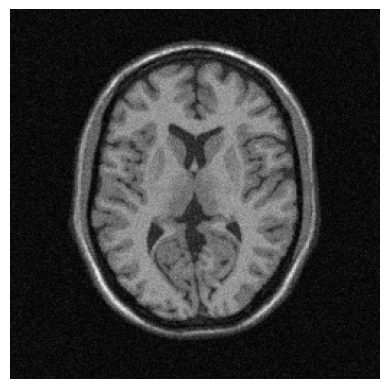

In [6]:
mat = loadmat('MR_data.mat')

Input = mat['I_noisy1']

plt.imshow(Input, cmap='gray')
plt.axis('off')
plt.show()


Jest to obraz rezonansu magnetycznego. Jest to obrazowanie, w którym wykorzystuje się silne pole magnetyczne i fale radiowe do tworzenia szczegółowych obrazów wewnętrznych ciała ludzkiego

### "Klasyczna" konwolucja

1. Zdefiniuj parametry filtra Gaussowskiego: rozmiar okna i wariancję $\delta_S$.
2. Oblicz współczynniki filtra na podstawie zdefiniowanych parametrów (najprościej w ramach podwójnej pętli for).
2. Sprawdź ich poprawność i zwizualizuj filtr (tak jak w ćwiczeniu pt. "Przetwarzanie wstępne. Filtracja kontekstowa.").
3. Wykonaj kopię obrazu wejściowego: `IConv = Input.copy()`
4. Wykonaj podwójną pętlę po obrazie. Pomiń ramkę, dla której nie jest zdefiniowany kontekst o wybranej wielkości.
5. W każdej iteracji stwórz dwuwymiarową tablicę zawierającą aktualny kontekst.
6. Napisz funkcję, która będzie obliczała nową wartość piksela.
Argumentem tej funkcji są aktualnie przetwarzane okno i współczynniki filtra.
7. Obliczoną wartość przypisz do odpowiedniego piksela kopii obrazu wejściowego.
8. Wyświetl wynik filtracji.
9. Porównaj wynik z obrazem oryginalnym.

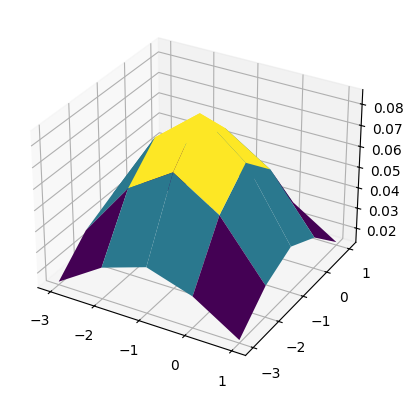

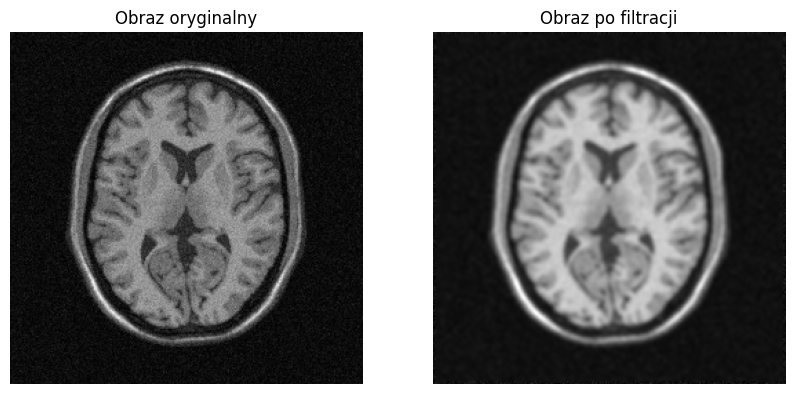

In [7]:
kernel_size = 5
sigma = 1.5

def gaussian_kernel(kernel_size, sigma):
    kernel = np.fromfunction(lambda x, y: (1/(2*np.pi*sigma**2)) * np.exp(-((x-(kernel_size-1)/2)**2 + (y-(kernel_size-1)/2)**2)/(2*sigma**2)), (kernel_size, kernel_size))
    return kernel / np.sum(kernel)

def mesh(fun, size):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    X = np.arange(-size//2, size//2, 1)
    Y = np.arange(-size//2, size//2, 1)
    X, Y = np.meshgrid(X, Y)
    
    ax.plot_surface(X, Y, fun, cmap='viridis')
    
    plt.show()

Input = mat['I_noisy1']
IConv = Input.copy()

kernel = gaussian_kernel(kernel_size, sigma)

mesh(kernel, kernel_size)

for i in range(kernel_size//2, Input.shape[0] - kernel_size//2):
    for j in range(kernel_size//2, Input.shape[1] - kernel_size//2):
        context = Input[i-kernel_size//2:i+kernel_size//2+1, j-kernel_size//2:j+kernel_size//2+1]
        
        def apply_filter(context, kernel):
            return np.sum(np.multiply(context, kernel))
        
        IConv[i, j] = apply_filter(context, kernel)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(Input, cmap='gray')
plt.title('Obraz oryginalny')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(IConv, cmap='gray')
plt.title('Obraz po filtracji')
plt.axis('off')

plt.show()


Obraz po filtracji jest jaśniejszy, zakłócenia są mniej widoczne, jednak cały obraz jest również bardziej rozmazany.

### Filtracja bilateralna

1. Zdefiniuj dodatkowy parametr: wariancję $\delta_R$.
3. Wykonaj kopię obrazu wejściowego: `IBilateral = Input.copy()`
4. Wykonaj podwójną pętlę po obrazie. Pomiń ramkę, dla której nie jest zdefiniowany kontekst o wybranej wielkości.
5. W każdej iteracji stwórz dwuwymiarową tablicę zawierającą aktualny kontekst.
6. Napisz funkcję, która będzie obliczała nową wartość piksela.
Argumentami funkcji są aktualnie przetwarzane okno, współczynniki filtra gaussowskiego (takie same jak wcześniej) i wariancja $\delta_R$.
7. Oblicz odległość w przeciwdziedzinie (dla wartości pikseli).
8. Oblicz funkcję Gaussa dla obliczonych odległości z zadanym parametrem.
9. Wykonaj normalizację obliczonych współczynników.
10. Obliczoną wartość przypisz do odpowiedniego piksela kopii obrazu wejściowego.
11. Wyświetl wynik filtracji.
12. Porównaj wynik z obrazem oryginalnym.

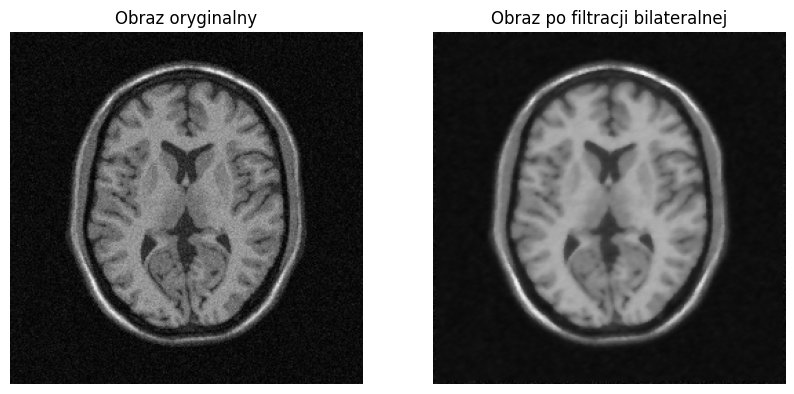

: 

In [8]:
def pixel_out_2(okno, filtr, variancy, delta_r):
    A, B = okno.shape
    pixel = 0
    normalization = 0
    x = [A//2, B//2]
    for i in range(A):
        for j in range(B):
            AB = [i, j]
            
            y = np.sqrt(((x[0]-AB[0])**2) + ((x[1]-AB[1])**2))
            gaus = np.exp(-(y**2) / (2*(variancy**2)))
            
            diff = np.abs(okno[A//2, B//2] - okno[i, j])
            gaus_diff = np.exp(-(diff**2) / (2*(delta_r**2)))
            
            pixel += gaus * gaus_diff * okno[i, j]
            normalization += gaus * gaus_diff
    pixel /= normalization
    return pixel

def bilateral(img, window, variancy, delta_r):
    filtr = gaussian_kernel(window, variancy)
    IConvolucja = img.copy()
    (X, Y) = IConvolucja.shape
    polowa = window // 2
    for i in range(polowa, X - polowa):
        for j in range(polowa, Y - polowa):
            okno = IConvolucja[i-polowa:i+polowa+1, j-polowa:j+polowa+1]
            new_pixel = pixel_out_2(okno, filtr, variancy, delta_r)
            IConvolucja[i, j] = new_pixel
    return IConvolucja

Input = mat['I_noisy1']
IBilateral = Input.copy()
kernel_size = 5
sigma = 1.5
delta_R = 50
IBilateral = bilateral(Input, kernel_size, sigma, delta_R)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(Input, cmap='gray')
plt.title('Obraz oryginalny')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(IBilateral, cmap='gray')
plt.title('Obraz po filtracji bilateralnej')
plt.axis('off')

plt.show()


Tak jak w poprzednim przypadku, zakłócenia są mniej widoczne, jednak cały obraz jest również bardziej rozmazany.